In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
import numpy as np
import monte_carlo
import sarsa
import common
import visualize

In [118]:
n_episodes = int(1e6)
window_len = 1 + int(1e4)
window_type = 'hanning'
n_eval_episodes = int(1e4)
evaluation_episodes = [2**ii for ii in range(int(np.ceil(np.log2(n_episodes))))]
Q, monte_carlo_rewards, monte_carlo_eval = monte_carlo.train(
    n_episodes=n_episodes, gamma=1., epsilon=0.01, evaluation_episodes=evaluation_episodes,
    n_evaluate_episodes=n_eval_episodes)
monte_carlo_smoothed = visualize.smooth(
    monte_carlo_rewards, window_len=window_len, window=window_type)
Q, sarsa_rewards, sarsa_eval = sarsa.train(n_episodes=n_episodes, alpha=0.01, gamma=1.0,
    epsilon=0.01, evaluation_episodes=evaluation_episodes, n_evaluate_episodes=n_eval_episodes)
sarsa_smoothed = visualize.smooth(
    sarsa_rewards, window_len=window_len, window=window_type)

MONTE CARLO training 1000000 episodes took 42.966835021972656 seconds
SARSA training 1000000 episodes took 39.64010810852051 seconds


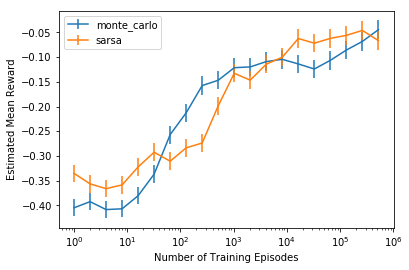

In [121]:
plt.errorbar(
    monte_carlo_eval['episode_no'], monte_carlo_eval['mean_reward'], yerr=monte_carlo_eval['95%'],
    label='monte_carlo')
plt.errorbar(
    sarsa_eval['episode_no'], sarsa_eval['mean_reward'], yerr=sarsa_eval['95%'],
    label='sarsa')
plt.xlabel('Number of Training Episodes')
plt.ylabel('Estimated Mean Reward')
plt.gca().set_xscale('log')
plt.legend()
plt.show()

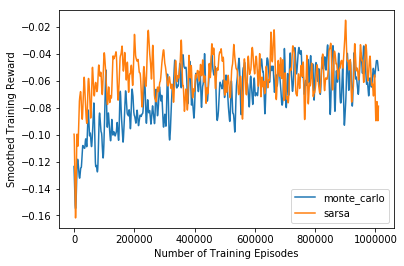

In [120]:
plt.plot(monte_carlo_smoothed, label='monte_carlo')
plt.plot(sarsa_smoothed, label='sarsa')
plt.legend()
plt.xlabel('Number of Training Episodes')
plt.ylabel('Smoothed Training Reward')
plt.show()

In [137]:
n_episodes = int(1e6)
window_len = 1 + int(1e4)
window_type = 'hanning'
smoothed = {}
evals = {}
n_eval_episodes = int(1e4)
evaluation_episodes = [2**ii for ii in range(int(np.ceil(np.log2(n_episodes))))]
for alpha in [1., 0.01, 0.0001]:
    Q, rewards, evaluation = sarsa.train(
        n_episodes=n_episodes, alpha=alpha, gamma=1.0, epsilon=0.01,
        evaluation_episodes=evaluation_episodes, n_evaluate_episodes=n_eval_episodes)
    smoothed[r'$\alpha$=' + str(alpha)] = visualize.smooth(
        rewards, window_len=window_len, window=window_type)
    evals[r'$\alpha$=' + str(alpha)] = evaluation

SARSA training 1000000 episodes took 33.393534898757935 seconds
SARSA training 1000000 episodes took 38.56264805793762 seconds
SARSA training 1000000 episodes took 38.091712951660156 seconds


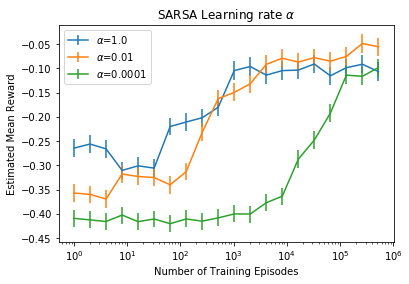

In [139]:
for label, eval_results in evals.items():
    plt.errorbar(eval_results['episode_no'], eval_results['mean_reward'],
                 yerr=eval_results['95%'], label=label)
plt.title(r'SARSA Learning rate $\alpha$')
plt.xlabel('Number of Training Episodes')
plt.ylabel('Estimated Mean Reward')
plt.gca().set_xscale('log')
plt.legend()
plt.show()

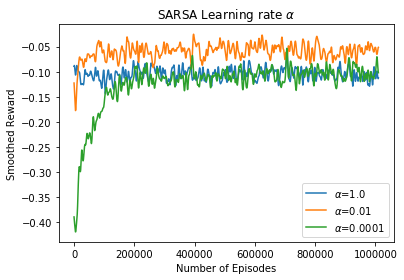

In [141]:
for label, smoothed_rewards in smoothed.items():
    plt.plot(smoothed_rewards, label=label)
plt.legend()
plt.title(r'SARSA Learning rate $\alpha$')
plt.xlabel('Number of Episodes')
plt.ylabel('Smoothed Reward')
plt.show()